In [1]:
import os
os.chdir("/home/nigga/engine")

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
import pickle
import numpy as np
from tensorflow.keras.callbacks import TensorBoard
import time


2025-12-21 02:59:32.553705: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-21 02:59:32.804450: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-21 02:59:35.341713: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
import json
with open("config/model_config.json") as f:
    config = json.load(f)

In [4]:
config["conv_layers"]
config["dense_layers"]
config["learning_rate"]

0.001

In [5]:
X = pickle.load(open("/home/nigga/engine/X.pickle", "rb"))
y = pickle.load(open("/home/nigga/engine/y.pickle", "rb"))
y = np.array(y)
X = X / 255.0
conv_layers = config["conv_layers"]
dense_layers = config["dense_layers"]

num_conv = len(conv_layers)
num_dense = len(dense_layers)

NAME = f"{num_conv}-conv-{num_dense}-dense-{int(time.time())}"
tensorboard = TensorBoard(log_dir=f"logs/{NAME}")

model = Sequential([
    Input(shape=(config["input_size"], config["input_size"], config["input_channels"]))
])

first = conv_layers[0]
model.add(Conv2D(
    first["filters"],
    (first["kernel"], first["kernel"]),
    input_shape=(config["input_size"], config["input_size"], config["input_channels"])
))
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2)))

for conv in conv_layers[1:]:
    model.add(Conv2D(conv["filters"], (conv["kernel"], conv["kernel"])))
    model.add(Activation("relu"))
    model.add(MaxPooling2D((2,2)))

model.add(Flatten())
for units in dense_layers:
    model.add(Dense(units))
    model.add(Activation("relu"))

model.add(Dense(1, activation="sigmoid"))
model.compile(
    optimizer=Adam(learning_rate=config["learning_rate"]),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

/home/nigga/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1766282379.845972   41377 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3584 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [6]:
print(X.shape)
print(y.shape)


(21868, 80, 80, 1)
(21868,)


In [7]:
history = model.fit(
    X,
    y,
    batch_size=32,
    epochs=20,
    validation_split=0.2
)


Epoch 1/20


2025-12-21 02:59:50.115178: I external/local_xla/xla/service/service.cc:163] XLA service 0x77a6680172b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-21 02:59:50.115622: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-12-21 02:59:50.181244: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-21 02:59:50.463987: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91600
2025-12-21 02:59:50.517388: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-12-21 02:59:50.

 25/547 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5251 - loss: 0.7053

I0000 00:00:1766282394.883648   41462 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


545/547 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6532 - loss: 0.6160

2025-12-21 02:59:56.811330: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-12-21 02:59:57.474208: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_303', 292 bytes spill stores, 292 bytes spill loads



547/547 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.7124 - loss: 0.5606 - val_accuracy: 0.7810 - val_loss: 0.4705
Epoch 2/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7937 - loss: 0.4449 - val_accuracy: 0.8034 - val_loss: 0.4213
Epoch 3/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8306 - loss: 0.3780 - val_accuracy: 0.7942 - val_loss: 0.4520
Epoch 4/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8624 - loss: 0.3145 - val_accuracy: 0.8125 - val_loss: 0.4125
Epoch 5/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8981 - loss: 0.2382 - val_accuracy: 0.8064 - val_loss: 0.4683
Epoch 6/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9416 - loss: 0.1471 - val_accuracy: 0.8052 - val_loss: 0.5580
Epoch 7/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9665 - loss: 0.0900 - val_accuracy: 0.8096 - val_loss: 0.7827
Epoch 8/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9794 - loss: 0.0564 - val_accuracy: 0.8098 - va

In [8]:
MODEL_PATH = "/home/nigga/engine/model/cat_model_tracer.keras"
model.save(MODEL_PATH)


In [9]:
import os
print(os.path.exists(MODEL_PATH))  # must be True


True


In [10]:
from tensorflow.keras.models import load_model
model = load_model(MODEL_PATH)

In [11]:
import tensorflow as tf
import os
os.chdir("/home/nigga/engine")
from tracer.tracing import *

In [12]:
trace_model, tr_info = build_tracer_model(model)

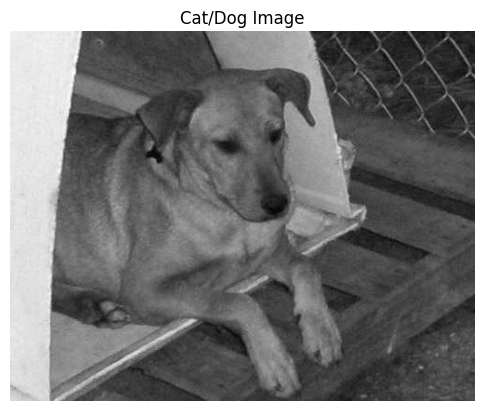

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
Raw prediction: 0.001058276
Class: Dog


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMG_PATH = "/home/nigga/engine/data/cats/Dog/100.jpg"
IMG_SIZE = 80  # must match your training images

# Load image in grayscale
img = cv2.imread(IMG_PATH, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')  # Grayscale colormap
plt.title("Cat/Dog Image")
plt.axis('off')
plt.show()
img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

img = img / 255.0

img = np.reshape(img, (1, IMG_SIZE, IMG_SIZE, 1))

prediction = model.predict(img)[0][0]
print("Raw prediction:", prediction)
print("Class:", "Cat" if prediction > 0.5 else "Dog")


In [14]:
traced_outputs = trace_model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step


In [15]:
trace_results = []
for output, info in zip(traced_outputs,tr_info):
    trace_results.append({
        "layer_name": info['layer_name'],
        'type':info['type'],
    'value_type':info['value'],
        'shape':output.shape,
        'values':output.tolist()
    })

In [16]:
TRACE_PATH = "/home/nigga/engine/output/traced_forward_pass.json"

with open(TRACE_PATH, "w") as f:
    json.dump(trace_results, f, indent=2)

print(os.path.exists(TRACE_PATH))  # must be True


True


In [23]:
import json

with open(TRACE_PATH) as f:
    traced = json.load(f)


In [29]:
conv_layer = next(
    x for x in traced if x["type"] == "conv"
)
feature_maps = conv_layer["values"][0]

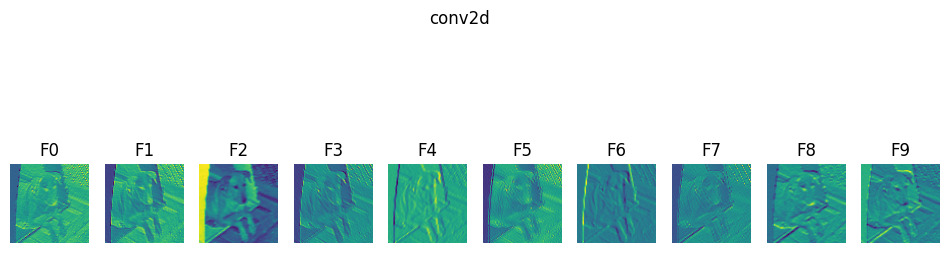

In [45]:
import matplotlib.pyplot as plt
feature_maps = np.array(feature_maps)

N = min(10, len(feature_maps[0,0,:]))  # number of filters to show

plt.figure(figsize=(12,4))
for i in range(N):
    plt.subplot(1, N, i+1)
    plt.imshow(feature_maps[:, :, i], cmap="viridis")
    plt.axis("off")
    plt.title(f"F{i}")
plt.suptitle(conv_layer["layer_name"])
plt.show()
